# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
#from sklearn.tree import export_graphviz
#import graphviz

## Part 1: Gradient Descent

### Set Up

In [2]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [3]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


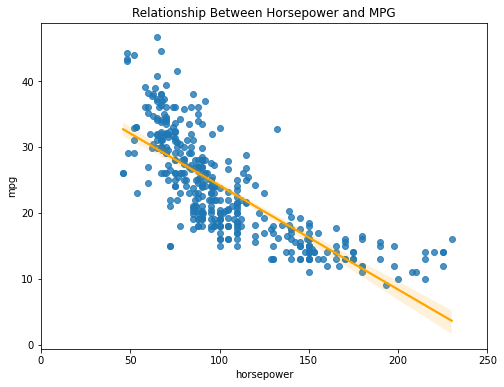

In [4]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](img/slope-rss-relationship.png)

In [ ]:
# call_on_students(1)

#### Answer: 

- Plot shows the error (RSS) on the y-axis and the slope of the model on the x-axis
From this graph you can see that it arrived at about m = -0.158 for the optimal coefficient value, since it's around that point that the error term (RSS) is smallest


### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [ ]:
# call_on_students(1)

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [ ]:
# call_on_students(1)

#### Answer: 

- Step size captures the amount to change the coefficient as it tries to minimize the error term
Learning rate determines how large those steps are to start


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [ ]:
# call_on_students(1)

#### Answer: 

- Logistical Regression is used for classification problems (Categorical Targets) 
- Outputs: Log-odds, which are translated into probabilities 
- Different from linear regression in that LINEAR predict a continuous target and is not bound between 0 and 1.  Logreg target is categorical and NON continuous.  Log Reg is evaluated by: accuracy, recvall, precision.  Linear Reg metrics;  r2, rmse, mse, etc.
- Similarities: both are parametric models 
- Log Reg is a Parametric model 


### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [5]:
# call_on_students(1)

#### Answer: 

- Benefit: Simple to interpret, fits quickly, not prone to overfitting 
- Another model may be more useful if the taget is imbalanced, or if there are interaction terms in the data 


## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [6]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [7]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [ ]:
# call_on_students(1)

In [9]:
# Train-test split
X = mpg_class.drop(columns='target')
y = mpg_class['target']
# Set test_size=0.33 and random_state=42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [ ]:
# call_on_students(1)

#### Part 1: explore the target column breakdown in train data

In [13]:
# Code to explore
y_train.value_counts()

0    195
1     67
Name: target, dtype: int64

In [14]:
# Code to explore
y_train.value_counts(normalize=True)

0    0.744275
1    0.255725
Name: target, dtype: float64

#### Answer:

- Here, we see an imblanced target. 74% of the training data is in class 0 


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- I'm not sure I understand this question. But the solution says, "Predicting only our majority class, 0".  So it must be asking, without having a balanced data set, and without creating a model, our data makes it seem like there is 3:1 odds of getting 0.


#### Part 3: How accurate would that baseline be on test data?


In [16]:
# Code to find the answer
y_test.value_counts(normalize=True)

0    0.753846
1    0.246154
Name: target, dtype: float64

#### Answer:

- It would be 75% accurate on the test data. 


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [ ]:
# call_on_students(1)

#### Answer:

- As mentioned earlier, this target is imbalanced.
- Some ways we could address this: Oversampling the minority class, SMOTE the minority class- synthetic oversampling, set 'class_weight' parameter 
- Undersampling does NOT make sense here since our dataset is quite small. ( If you have millions of data, then you can undersample) 


### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [ ]:
# call_on_students(1)

In [ ]:
#$regularization is built into logistic regression, so we have to scale data beforehand
#(or could do penalty = 1 if we dont want to)

In [17]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

/Users/bryankeating/miniconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


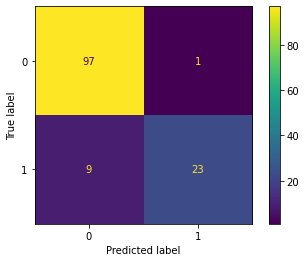

In [18]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(logreg, X_test_scaled, y_test)

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [20]:
# call_on_students(1)

In [21]:
#Grab predictions - if using sklearn functions 
test_preds = logreg.predict(X_test_scaled)

In [28]:
# Accuracy
accuracy = accuracy_score(y_test, test_preds)
print(accuracy)



# By hand: TP + TN / TP + TN + FP + FN
accuracy = (23 + 97) / (23 + 97 + 1 + 9)
print(accuracy)


0.9230769230769231
0.9230769230769231


In [29]:
# Precision
precision = precision_score(y_test, test_preds)
print(precision)


# By hand: TP / TP + FP
precision = 23 / (23 + 1)
print(precision)

0.9583333333333334
0.9583333333333334


In [30]:
# Recall
recall = recall_score(y_test, test_preds)
print(recall)


# By hand: TP / TP + FN
recall = 23 / (23 + 9)
print(recall)

0.71875
0.71875


In [31]:
# F1-Score
f1score = f1_score(y_test, test_preds)
print(f1score)


# By hand
f1score = 2 * precision * recall / (precision + recall)
print(f1score)


0.8214285714285714
0.8214285714285714


### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [ ]:
# call_on_students(1)

In [32]:
# Calculate roc-auc
#need predicted probabilities 
test_probas = logreg.predict_proba(X_test_scaled)[:,1]

roc_auc_score(y_test, test_probas)

0.9811862244897959

/Users/bryankeating/miniconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


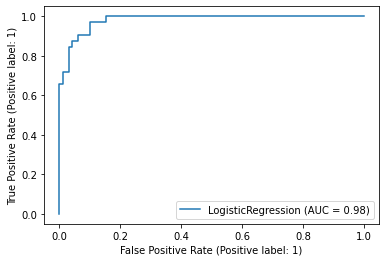

In [33]:
# Plot the ROC curve
plot_roc_curve(logreg, X_test_scaled, y_test);

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [ ]:
# call_on_students(1)

#### Answer:

- It received a very good score. More FN than False Positives *better precision than recall) 


## Part 4: Decision Trees

### Set Up


In [37]:
# Helper function from a colleague (h/t Bryan)
def plot_tree(dt, used_cols, out_file='mytree.dot'):
    export_graphviz(dt, out_file=out_file, 
                    filled=True, feature_names=used_cols, 
                    leaves_parallel=True, node_ids=True)
    with open(out_file) as f:
        dot_graph = f.read()
    return graphviz.Source(dot_graph)

In [38]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [39]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, ['weight'])

NameError: name 'export_graphviz' is not defined

In [40]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, ['origin'])

NameError: name 'export_graphviz' is not defined

#### Images:

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](img/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](img/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- The first DT produces more pure splits, thus is doing a better job of separating the data ... though, the second one does a very good job seperating some of the data, which could also be valuable 


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [ ]:
# call_on_students(1)

In [41]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

/Users/bryankeating/miniconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


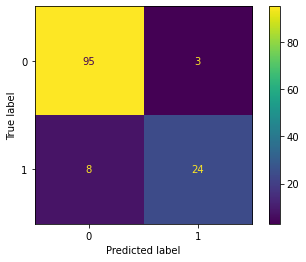

In [42]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(dt, X_test_scaled, y_test)
plt.show() 

/Users/bryankeating/miniconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/bryankeating/miniconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


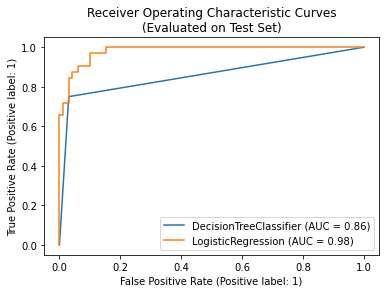

In [43]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test_scaled, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- Logistic Regression has the higher roc-auc score, and has more area under the curve(defer to graph) 
